# Introduction to pyrpl

## 1) Introduction

The RedPitaya is an affordable FPGA board with fast analog inputs and outputs. This makes it interesting also for quantum optics experiments. The software package PyRPL (Python RedPitaya Lockbox) is an implementation of many devices that are needed for optics experiments every day. The user interface and all high-level functionality is written in python, but an essential part of the software is hidden in a custom FPGA design (based on the official RedPitaya software version 0.95). While most users probably never want to touch the FPGA design, the Verilog source code is provided together with this package and may be modified to customize the software to your needs. 

# 2) Table of contents

In this document, you will find the following sections:
1. Introduction
2. ToC
3. Installation
4. First steps
5. RedPitaya Modules
6. The Pyrpl class
7. The Graphical User Interface

If you are using Pyrpl for the first time, you should read sections 1-4. This will take about 15 minutes and should leave you able to communicate with your RedPitaya via python.

If you plan to use Pyrpl for a project that is not related to quantum optics, you probably want to go to section 5 then and omit section 6 altogether. Inversely, if you are only interested in a powerful tool for quantum optics and dont care about the details of the implementation, go to section 6. If you plan to contribute to the repository, you should definitely read section 5 to get an idea of what this software package realy does, and where help is needed. Finaly, Pyrpl also comes with a Graphical User Interface (GUI) to interactively control the modules described in section 5. Please, read section 7 for a quick description of the GUI.

# 3) Installation

### Option 3: Simple clone from GitHub (developers)

If instead you plan to synchronize with github on a regular basis, you can also leave the downloaded code where it is and add the parent directory of the pyrpl folder to the PYTHONPATH environment variable as described in this thread: http://stackoverflow.com/questions/3402168/permanently-add-a-directory-to-pythonpath. For all beta-testers and developers, this is the preferred option. So the typical PYTHONPATH environment variable should look somewhat like this:
$\texttt{PYTHONPATH=C:\OTHER_MODULE;C:\GITHUB\PYRPL}$

If you are experiencing problems with the dependencies on other python packages, executing the following command in the pyrpl directory might help:

$\texttt{python setup.py install develop}$

If at a later point, you have the impression that updates from github are not reflected in the program's behavior, try this: 

In [ ]:
import pyrpl
print(pyrpl.__file__)

Should the directory not be the one of your local github installation, you might have an older version of pyrpl installed. Just delete any such directories other than your principal github clone and everything should work. 

### Option 2: from GitHub using setuptools (beta version)

Download the code manually from https://github.com/lneuhaus/pyrpl/archive/master.zip and unzip it or get it directly from git by typing 

$\texttt{git clone https://github.com/lneuhaus/pyrpl.git YOUR_DESTINATIONFOLDER}$

In a command line shell, navigate into your new local pyrplockbox directory and execute

$\texttt{python setup.py install}$

This copies the files into the side-package directory of python. The setup should make sure that you have the python libraries paramiko (http://www.paramiko.org/installing.html) and scp (https://pypi.python.org/pypi/scp) installed. If this is not the case you will get a corresponding error message in a later step of this tutorial. 

### Option 1: with pip (coming soon)

If you have pip correctly installed, executing the following line in a command line should install pyrplockbox and all dependencies: 

$\texttt{pip install pyrpl}$

In [ ]:
#no-test
!pip install pyrpl #if you look at this file in ipython notebook, just execute this cell to install pyrplockbox

### Compiling the server application (optional)

The software comes with a precompiled version of the server application (written in C) that runs on the RedPitaya. This application is uploaded automatically when you start the connection. If you made changes to this file, you can recompile it by typing

$\texttt{python setup.py compile_server}$

For this to work, you must have gcc and the cross-compiling libraries installed. Basically, if you can compile any of the official RedPitaya software written in C, then this should work, too. 
If you do not have a working cross-compiler installed on your UserPC, you can also compile directly on the RedPitaya (tested with ecosystem v0.95). To do so, you must upload the directory pyrpl/monitor_server on the redpitaya, and launch the compilation with the command
$\texttt{make CROSS_COMPILE=}$



### Compiling the FPGA bitfile (optional)

If you would like to modify the FPGA code or just make sure that it can be compiled, you should have a working installation of Vivado 2015.4. For windows users it is recommended to set up a virtual machine with Ubuntu on which the compiler can be run in order to avoid any compatibility problems. For the FPGA part, you only need the /fpga subdirectory of this software. Make sure it is somewhere in the file system of the machine with the vivado installation. Then type the following commands. You should adapt the path in the first and second commands to the locations of the Vivado installation / the fpga directory in your filesystem: 

$\texttt{source /opt/Xilinx/Vivado/2015.4/settings64.sh}$

$\texttt{cd /home/myusername/fpga}$

$\texttt{make}$

The compilation should take between 15 and 30 minutes. The result will be the file $\texttt{fpga/red_pitaya.bin}$. To test the new FPGA design, make sure that this file  in the fpga subdirectory of your pyrpl code directory. That is, if you used a virtual machine for the compilation, you must copy the file back to the original machine on which you run pyrpl.

### Unitary tests (optional)

In order to make sure that any recent changes do not affect prior functionality, a large number of automated tests have been implemented. Every push to the github repository is automatically installed tested on an empty virtual linux system. However, the testing server has currently no RedPitaya available to run tests directly on the FPGA. Therefore it is also useful to run these tests on your local machine in case you modified the code. 

Currently, the tests confirm that 
- all pyrpl modules can be loaded in python
- all designated registers can be read and written
- future: functionality of all major submodules against reference benchmarks

To run the test, navigate in command line into the pyrpl directory and type

$\texttt{set REDPITAYA=192.168.1.100}$ (in windows) or 

$\texttt{export REDPITAYA=192.168.1.100}$ (in linux)

$\texttt{python setup.py nosetests}$

The first command tells the test at which IP address it can find a RedPitaya. The last command runs the actual test. After a few seconds, there should be some output saying that the software has passed more than 140 tests. 

After you have implemented additional features, you are encouraged to add unitary tests to consolidate the changes. If you immediately validate your changes with unitary tests, this will result in a huge productivity improvement for you. You can find all test files in the folder $\texttt{pyrpl/pyrpl/test}$, and the existing examples (notably $\texttt{test_example.py}$) should give you a good point to start. As long as you add a function starting with 'test_' in one of these files, your test should automatically run along with the others. As you add more tests, you will see the number of total tests increase when you run the test launcher. 

### Workflow to submit code changes (for developers)

As soon as the code will have reached version 0.9.0.3 (high-level unitary tests implemented and passing, approx. end of May 2016), we will consider the master branch of the github repository as the stable pre-release version. The goal is that the master branch will guarantee functionality at all times. 

Any changes to the code, if they do not pass the unitary tests or have not been tested, are to be submitted as pull-requests in order not to endanger the stability of the master branch. We will briefly desribe how to properly submit your changes in that scenario. 

Let's say you already changed the code of your local clone of pyrpl. Instead of directly committing the change to the master branch, you should create your own branch. In the windows application of github, when you are looking at the pyrpl repository, there is a small symbol looking like a steet bifurcation in the upper left corner, that says "Create new branch" when you hold the cursor over it. Click it and enter the name of your branch "leos development branch" or similar. The program will automatically switch to that branch. Now you can commit your changes, and then hit the "publish" or "sync" button in the upper right. That will upload your changes so everyone can see and test them. 

You can continue working on your branch, add more commits and sync them with the online repository until your change is working. If the master branch has changed in the meantime, just click 'sync' to download them, and then the button "update from master" (upper left corner of the window) that will insert the most recent changes of the master branch into your branch. If the button doesn't work, that means that there are no changes available. This way you can benefit from the updates of the stable pre-release version, as long as they don't conflict with the changes you have been working on. If there are conflicts, github will wait for you to resolve them. In case you have been recompiling the fpga, there will always be a conflict w.r.t. the file 'red_pitaya.bin' (since it is a binary file, github cannot simply merge the differences you implemented). The best way to deal with this problem is to recompile the fpga bitfile after the 'update from master'. This way the binary file in your repository will correspond to the fpga code of the merged verilog files, and github will understand from the most recent modification date of the file that your local version of red_pitaya.bin is the one to keep. 

At some point, you might want to insert your changes into the master branch, because they have been well-tested and are going to be useful for everyone else, too. To do so, after having committed and synced all recent changes to your branch, click on "Pull request" in the upper right corner, enter a title and description concerning the changes you have made, and click "Send pull request". Now your job is done. I will review and test the modifications of your code once again, possibly fix incompatibility issues, and merge it into the master branch once all is well. After the merge, you can delete your development branch. If you plan to continue working on related changes, you can also keep the branch and send pull requests later on. If you plan to work on a different feature, I recommend you create a new branch with a name related to the new feature, since this will make the evolution history of the feature more understandable for others. Or, if you would like to go back to following the master branch, click on the little downward arrow besides the name of your branch close to the street bifurcation symbol in the upper left of the github window. You will be able to choose which branch to work on, and to select master. 

Let's all try to stick to this protocol. It might seem a little complicated at first, but you will quikly appreciate the fact that other people's mistakes won't be able to endanger your working code, and that by following the commits of the master branch alone, you will realize if an update is incompatible with your work.

## 4) First steps

If the installation went well, you should now be able to load the package in python. If that works you can pass directly to the next section 'Connecting to the RedPitaya'.

In [ ]:
from pyrpl import Pyrpl

Sometimes, python has problems finding the path to pyrplockbox. In that case you should add the pyrplockbox directory to your pythonpath environment variable (http://stackoverflow.com/questions/3402168/permanently-add-a-directory-to-pythonpath). If you do not know how to do that, just manually navigate the ipython console to the directory, for example: 

In [ ]:
#no-test
cd c:\lneuhaus\github\pyrpl

Now retry to load the module. It should really work now. 

In [2]:
from pyrpl import Pyrpl

### Connecting to the RedPitaya

You should have a working SD card (any version of the SD card content is okay) in your RedPitaya (for instructions see http://redpitaya.com/quick-start/). The RedPitaya should be connected via ethernet to your computer. To set this up, there is plenty of instructions on the RedPitaya website (http://redpitaya.com/quick-start/). If you type the ip address of your module in a browser, you should be able to start the different apps from the manufacturer. The default address is http://192.168.1.100.
If this works, we can load the python interface of pyrplockbox by specifying the RedPitaya's ip address. If you leave the HOSTNAME blanck, a popup window will open up to let you choose among the various connected Redpitayas on your local network.

In [3]:
#define hostname
HOSTNAME = "_FAKE_"

In [4]:
from pyrpl import Pyrpl
# p = Pyrpl(config='',  # do not use a config file
#           #config='tutorial',  # this would continuously save the current redpitaya state to a file "tutorial.yml" 
#           hostname=HOSTNAME)
p =Pyrpl(config='', hostname=HOSTNAME)

<!-- If you see at least one '>' symbol, your computer has successfully connected to your RedPitaya via SSH. This means that your connection works. The message 'Server application started on port 2222' means that your computer has sucessfully installed and started a server application on your RedPitaya. Once you get 'Client started with success', your python session has successfully connected to that server and all things are in place to get started. -->

### Basic communication with your RedPitaya

In [7]:
#check the value of input1
print(p.rp.scope.voltage_in1)

0.0001220703125


With the last command, you have successfully retrieved a value from an FPGA register. This operation takes about 300 µs on my computer. So there is enough time to repeat the reading n times.

In [ ]:
#see how the adc reading fluctuates over time
import time
from matplotlib import pyplot as plt
times,data = [],[]
t0 = time.time()
n = 3000
for i in range(n):
    times.append(time.time()-t0)
    data.append(p.rp.scope.voltage_in1)
print("Rough time to read one FPGA register: ", (time.time()-t0)/n*1e6, "µs")
%matplotlib inline
f, axarr = plt.subplots(1,2, sharey=True)
axarr[0].plot(times, data, "+");
axarr[0].set_title("ADC voltage vs time");
axarr[1].hist(data, bins=10,normed=True, orientation="horizontal");
axarr[1].set_title("ADC voltage histogram");

You see that the input values are not exactly zero. This is normal with all RedPitayas as some offsets are hard to keep zero when the environment changes (temperature etc.). So we will have to compensate for the offsets with our software. Another thing is that you see quite a bit of scatter beetween the points - almost as much that you do not see that the datapoints are quantized. The conclusion here is that the input noise is typically not totally negligible. Therefore we will need to use every trick at hand to get optimal noise performance. 

After reading from the RedPitaya, let's now try to write to the register controlling the first 8 yellow LED's on the board. The number written to the LED register is displayed on the LED array in binary representation. You should see some fast flashing of the yellow leds for a few seconds when you execute the next block.

In [ ]:
#blink some leds for 5 seconds
from time import sleep
for i in range(1025):
    p.rp.hk.led=i
    sleep(0.005)

In [ ]:
# now feel free to play around a little to get familiar with binary representation by looking at the leds.
from time import sleep
p.rp.hk.led = 0b00000001
for i in range(10):
    p.rp.hk.led = ~p.rp.hk.led>>1
    sleep(0.2)

In [ ]:
import random
for i in range(100):
    p.rp.hk.led = random.randint(0,255)
    sleep(0.02)

## 5) RedPitaya modules

Let's now look a bit closer at the class RedPitaya. Besides managing the communication with your board, it contains different modules that represent the different sections of the FPGA. You already encountered two of them in the example above: "hk" and "scope". Here is the full list of modules:

In [6]:
r = p.rp #redpitaya object
r.hk #"housekeeping" = LEDs and digital inputs/outputs
r.ams #"analog mixed signals" = auxiliary ADCs and DACs.

r.scope #oscilloscope interface

r.asg0 #"arbitrary signal generator" channel 1
r.asg1 #"arbitrary signal generator" channel 2

r.pid0 #first of four PID modules
r.pid1
r.pid2

r.iq0 #first of three I+Q quadrature demodulation/modulation modules
r.iq1
r.iq2

r.iir #"infinite impules response" filter module that can realize complex transfer functions

### ASG and Scope module

### Arbitrary Signal Generator

There are two Arbitrary Signal Generator modules: asg1 and asg2. For these modules, any waveform composed of $2^{14}$ programmable points is sent to the output with arbitrary frequency and start phase upon a trigger event. 

In [ ]:
asg = r.asg0 # make a shortcut
print("Trigger sources:", asg.trigger_sources)
print("Output options: ", asg.output_directs)

Let's set up the ASG to output a sawtooth signal of amplitude 0.8 V (peak-to-peak 1.6 V) at 1 MHz on output 2:

In [ ]:
asg.output_direct = 'out2'
asg.setup(waveform='halframp', frequency=20e4, amplitude=0.8, offset=0, trigger_source='immediately')

### Oscilloscope

The scope works similar to the ASG but in reverse: Two channels are available. A table of $2^{14}$ datapoints for each channel is filled with the time series of incoming data. Downloading a full trace takes about 10 ms over standard ethernet. The rate at which the memory is filled is the sampling rate (125 MHz) divided by the value of 'decimation'. The property 'average' decides whether each datapoint is a single sample or the average of all samples over the decimation interval. 

In [ ]:
s = p.rp.scope # shortcut
print("Available decimation factors:", s.decimations)
print("Trigger sources:", s.trigger_sources)
print("Available inputs: ", s.inputs)

In [ ]:
s.inputs

Let's have a look at a signal generated by asg1. Later we will use convenience functions to reduce the amount of code necessary to set up the scope:

In [6]:
from pyrpl.async_utils import sleep
from pyrpl import RedPitaya

#reload everything
r = p.rp #redpitaya object
asg = r.asg1
s = r.scope

# turn off asg so the scope has a chance to measure its "off-state" as well 
asg.output_direct = "off"

# setup scope
s.input1 = 'asg1'

# pass asg signal through pid0 with a simple integrator - just for fun (detailed explanations for pid will follow)
r.pid0.input = 'asg1' 
r.pid0.ival = 0 # reset the integrator to zero
r.pid0.i = 1000 # unity gain frequency of 1000 hz
r.pid0.p = 1.0 # proportional gain of 1.0
r.pid0.inputfilter = [0,0,0,0] # leave input filter disabled for now

# show pid output on channel2
s.input2 = 'pid0'

# trig at zero volt crossing
s.threshold_ch1 = 0 

# positive/negative slope is detected by waiting for input to 
# sweept through hysteresis around the trigger threshold in 
# the right direction 
s.hysteresis_ch1 = 0.01

# trigger on the input signal positive slope
s.trigger_source = 'ch1_positive_edge'

# take data symetrically around the trigger event
s.trigger_delay = 0

# set decimation factor to 64 -> full scope trace is 8ns * 2^14 * decimation = 8.3 ms long
s.decimation = 64

# only 1 trace average
s.trace_average = 1

# setup the scope for an acquisition
curve = s.single_async()
sleep(0.001)
print("\nBefore turning on asg:")
print("Curve ready:", s.curve_ready()) # trigger should still be armed

# turn on asg and leave enough time for the scope to record the data
asg.setup(frequency=1e3, amplitude=0.3, start_phase=90, waveform='halframp', trigger_source='immediately')
sleep(0.010)

# check that the trigger has been disarmed
print("\nAfter turning on asg:")
print("Curve ready:", s.curve_ready())
print("Trigger event age [ms]:",8e-9*((s.current_timestamp&0xFFFFFFFFFFFFFFFF) - s.trigger_timestamp)*1000)

# plot the data
%matplotlib inline
curve = curve.result()
plt.plot(s.times*1e3, curve[0], s.times*1e3, curve[1]);
plt.xlabel("Time [ms]");
plt.ylabel("Voltage");


Before turning on asg:
Curve ready: True

After turning on asg:
Curve ready: True
Trigger event age [ms]: 18168.892832


InvalidStateError: Result is not set.

: 

What do we see? The blue trace for channel 1 shows just the output signal of the asg. The time=0 corresponds to the trigger event. One can see that the trigger was not activated by the constant signal of 0 at the beginning, since it did not cross the hysteresis interval. One can also see a 'bug': After setting up the asg, it outputs the first value of its data table until its waveform output is triggered. For the halframp signal, as it is implemented in pyrpl, this is the maximally negative value. However, we passed the argument start_phase=90 to the asg.setup function, which shifts the first point by a quarter period. Can you guess what happens when we set start_phase=180? You should try it out!

In green, we see the same signal, filtered through the pid module. The nonzero proportional gain leads to instant jumps along with the asg signal. The integrator is responsible for the constant decrease rate at the beginning, and the low-pass that smoothens the asg waveform a little. One can also foresee that, if we are not paying attention, too large an integrator gain will quickly saturate the outputs. 

In [ ]:
# useful functions for scope diagnostics
print("Curve ready:", s.curve_ready())
print("Trigger source:",s.trigger_source)
print("Trigger threshold [V]:",s.threshold_ch1)
print("Averaging:",s.average)
print("Trigger delay [s]:",s.trigger_delay)
print("Trace duration [s]: ",s.duration)
print("Trigger hysteresis [V]", s.hysteresis_ch1)
print("Current scope time [cycles]:",hex(s.current_timestamp))
print("Trigger time [cycles]:",hex(s.trigger_timestamp))
print("Current voltage on channel 1 [V]:", r.scope.voltage_in1)
print("First point in data buffer 1 [V]:", s.ch1_firstpoint)

### PID module

We have already seen some use of the pid module above. There are four PID modules available: pid0 to pid3. 

In [10]:
print(r.pid0.__doc__)


    A proportional/Integrator/Differential filter.

    The PID filter consists of a 4th order filter input stage, followed by a
    proportional and integral stage in parallel.

    .. warning:: at the moment, the differential stage of PIDs is disabled.

    Example:

    .. code-block :: python

        from pyrpl import Pyrpl
        pid = Pyrpl().rp.pid0

        # set a second order low-pass filter with 100 Hz cutoff frequency
        pid.inputfilter = [100, 100]
        # set asg0 as input
        pid.input = 'asg0'
        # setpoint at -0.1
        pid.setpoint = -0.1
        # integral gain at 0.1
        pid.i = 0.1
        # proportional gain at 0.1
        pid.p = 0.1

    .. code-block :: python

        >>> print(pid.ival)
        0.43545

    .. code-block :: python

        >>> print(pid.ival)
        0.763324
    
Setup Attributes:

- setpoint: pid setpoint [volts]
- p: pid proportional gain [1]
- i: pid integral unity-gain frequency [Hz]
- max_voltage: maximum output

In [8]:
print(r.pid0.help())

Please refer to the docstring of the function setup() or to the manual for further help! 


#### Proportional and integral gain

In [11]:
#make shortcut
pid = r.pid0

#turn off by setting gains to zero
pid.p,pid.i = 0,0
print("P/I gain when turned off:", pid.i,pid.p)

P/I gain when turned off: 0.0 0.0


In [ ]:
# small nonzero numbers set gain to minimum value - avoids rounding off to zero gain
pid.p = 1e-100
pid.i = 1e-100
print("Minimum proportional gain: ",pid.p)
print("Minimum integral unity-gain frequency [Hz]: ",pid.i)

In [ ]:
# saturation at maximum values
pid.p = 1e100
pid.i = 1e100
print("Maximum proportional gain: ",pid.p)
print("Maximum integral unity-gain frequency [Hz]: ",pid.i)

#### Control with the integral value register

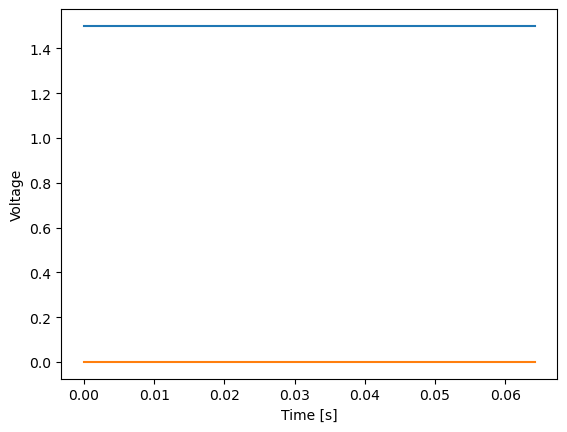

In [12]:
import numpy as np
#make shortcut
pid = r.pid0

# set input to asg1
pid.input = "asg1"

# set asg to constant 0.1 Volts
r.asg1.setup(waveform="dc", offset = 0.1)

# set scope ch1 to pid0
r.scope.input1 = 'pid0'

#turn off the gains for now
pid.p,pid.i = 0, 0

#set integral value to zero
pid.ival = 0

#prepare data recording
from time import time
times, ivals, outputs = [], [], []

# turn on integrator to whatever negative gain
pid.i = -10

# set integral value above the maximum positive voltage
pid.ival = 1.5 

#take 1000 points - jitter of the ethernet delay will add a noise here but we dont care
for n in range(1000):
    times.append(time())
    ivals.append(pid.ival)
    outputs.append(r.scope.voltage_in1)

#plot
import matplotlib.pyplot as plt
%matplotlib inline
times = np.array(times)-min(times)
plt.plot(times,ivals,times,outputs);
plt.xlabel("Time [s]");
plt.ylabel("Voltage");

Again, what do we see? We set up the pid module with a constant (positive) input from the ASG. We then turned on the integrator (with negative gain), which will inevitably lead to a slow drift of the output towards negative voltages (blue trace). We had set the integral value above the positive saturation voltage, such that it takes longer until it reaches the negative saturation voltage. The output of the pid module is bound to saturate at +- 1 Volts, which is clearly visible in the green trace. The value of the integral is internally represented by a 32 bit number, so it can practically take arbitrarily large values compared to the 14 bit output. You can set it within the range from +4 to -4V, for example if you want to exloit the delay, or even if you want to compensate it with proportional gain. 

#### Input filters

The pid module has one more feature: A bank of 4 input filters in series. These filters can be either off (bandwidth=0), lowpass (bandwidth positive) or highpass (bandwidth negative). The way these filters were implemented demands that the filter bandwidths can only take values that scale as the powers of 2. 

In [ ]:
# off by default
r.pid0.inputfilter

In [ ]:
# minimum cutoff frequency is 2 Hz, maximum 77 kHz (for now)
r.pid0.inputfilter = [1,1e10,-1,-1e10]
print(r.pid0.inputfilter)

In [ ]:
# not setting a coefficient turns that filter off
r.pid0.inputfilter = [0,4,8]
print(r.pid0.inputfilter)

In [ ]:
# setting without list also works
r.pid0.inputfilter = -2000
print(r.pid0.inputfilter)

In [ ]:
# turn off again
r.pid0.inputfilter = []
print(r.pid0.inputfilter)

You should now go back to the Scope and ASG example above and play around with the setting of these filters to convince yourself that they do what they are supposed to. 

### IQ module

Demodulation of a signal means convolving it with a sine and cosine at the 'carrier frequency'. The two resulting signals are usually low-pass filtered and called 'quadrature I' and and 'quadrature Q'. Based on this simple idea, the IQ module of pyrpl can implement several functionalities, depending on the particular setting of the various registers. In most cases, the configuration can be completely carried out through the setup function of the module. 

<img src="IQmodule.png">

Lock-in detection / PDH / synchronous detection

In [ ]:
#reload to make sure settings are default ones
#from pyrpl import Pyrpl
#r = Pyrpl(hostname=HOSTNAME, config='tutorial').rp

#shortcut
iq = r.iq0

# modulation/demodulation frequency 25 MHz
# two lowpass filters with 10 and 20 kHz bandwidth
# input signal is analog input 1
# input AC-coupled with cutoff frequency near 50 kHz
# modulation amplitude 0.1 V
# modulation goes to out1
# output_signal is the demodulated quadrature 1
# quadrature_1 is amplified by 10
iq.setup(frequency=25e6, bandwidth=[10e3,20e3], gain=0.0, 
         phase=0, acbandwidth=50000, amplitude=0.5, 
         input='in1', output_direct='out1', 
         output_signal='quadrature', quadrature_factor=10)

After this setup, the demodulated quadrature is available as the output_signal of iq0, and can serve for example as the input of a PID module to stabilize the frequency of a laser to a reference cavity. The module was tested and is in daily use in our lab. Frequencies as low as 20 Hz and as high as 50 MHz have been used for this technique. At the present time, the functionality of a PDH-like detection as the one set up above cannot be conveniently tested internally. We plan to upgrade the IQ-module to VCO functionality in the near future, which will also enable testing the PDH functionality. 

#### Network analyzer

When implementing complex functionality in the RedPitaya, the network analyzer module is by far the most useful tool for diagnostics. The network analyzer is able to probe the transfer function of any other module or external device by exciting the device with a sine of variable frequency and analyzing the resulting output from that device. This is done by demodulating the device output (=network analyzer input) with the same sine that was used for the excitation and a corresponding cosine, lowpass-filtering, and averaging the two quadratures for a well-defined number of cycles. From the two quadratures, one can extract the magnitude and phase shift of the device's transfer function at the probed frequencies. Let's illustrate the behaviour. For this example, you should connect output 1 to input 1 of your RedPitaya, such that we can compare the analog transfer function to a reference. Make sure you put a 50 Ohm terminator in parallel with input 1. 

In [ ]:
# shortcut for na
na = p.networkanalyzer
na.iq_name = 'iq1'

#take transfer functions. first: iq1 -> iq1, second iq1->out1->(your cable)->adc1
na.setup(start=1e3,stop=62.5e6,points=1001,rbw=1000,amplitude=0.2,input='iq1',output_direct='off', acbandwidth=0, trace_average=1)
iq1 = na.single()
na.setup(start=1e3,stop=62.5e6,points=1001,rbw=1000,amplitude=0.2,input='in1',output_direct='out1', acbandwidth=0, trace_average=1)
adc1 = na.single()
f = na.data_x
#plot
from pyrpl.hardware_modules.iir.iir_theory import bodeplot
%matplotlib inline
bodeplot([(f, iq1, "iq1->iq1"), (f, adc1, "iq1->out1->in1->iq1")], xlog=True)

If your cable is properly connected, you will see that both magnitudes are near 0 dB over most of the frequency range. Near the Nyquist frequency (62.5 MHz), one can see that the internal signal remains flat while the analog signal is strongly attenuated, as it should be to avoid aliasing. One can also see that the delay (phase lag) of the internal signal is much less than the one through the analog signal path. 

If you have executed the last example (PDH detection) in this python session, iq0 should still send a modulation to out1, which is added to the signal of the network analyzer, and sampled by input1. In this case, you should see a little peak near the PDH modulation frequency, which was 25 MHz in the example above. 

#### Lorentzian bandpass filter

The iq module can also be used as a bandpass filter with continuously tunable phase. Let's measure the transfer function of such a bandpass with the network analyzer:

In [ ]:
# shortcut for na and bpf (bandpass filter)
na = p.networkanalyzer
na.iq_name = 'iq1'
bpf = r.iq2

# setup bandpass
bpf.setup(frequency = 2.5e6, #center frequency
          Q=10.0, # the filter quality factor
          acbandwidth = 10e5, # ac filter to remove pot. input offsets
          phase=0, # nominal phase at center frequency (propagation phase lags not accounted for)
          gain=2.0, # peak gain = +6 dB 
          output_direct='off', 
          output_signal='output_direct', 
          input='iq1')

# take transfer function
na.setup(start=1e5, stop=4e6, points=201, rbw=100, avg=3, 
                     amplitude=0.2, input='iq2',output_direct='off', trace_average=1)
tf1 = na.single()

# add a phase advance of 82.3 degrees and measure transfer function
bpf.phase = 82.3
na.setup(start=1e5, stop=4e6, points=201, rbw=100, avg=3, 
                     amplitude=0.2, input='iq2',output_direct='off', trace_average=1)
tf2 = na.single()
f = na.data_x

#plot
from pyrpl.hardware_modules.iir.iir_theory import bodeplot
%matplotlib inline
bodeplot([(f, tf1, "phase = 0.0"), (f, tf2, "phase = %.1f"%bpf.phase)])

#### Frequency comparator module

To lock the frequency of a VCO (Voltage controlled oscillator) to a frequency reference defined by the RedPitaya, the IQ module contains the frequency comparator block. This is how you set it up. You have to feed the output of this module through a PID block to send it to the analog output. As you will see, if your feedback is not already enabled when you turn on the module, its integrator will rapidly saturate (-585 is the maximum value here, while a value of the order of 1e-3 indicates a reasonable frequency lock). 

In [ ]:
iq = r.iq0

# turn off pfd module for settings
iq.pfd_on = False

# local oscillator frequency
iq.frequency = 33.7e6

# local oscillator phase
iq.phase = 0
iq.input = 'in1' 
iq.output_direct = 'off'
iq.output_signal = 'pfd'

print("Before turning on:")
print("Frequency difference error integral", iq.pfd_integral)

print("After turning on:")
iq.pfd_on = True
for i in range(10):
    print("Frequency difference error integral", iq.pfd_integral)

### IIR module

Sometimes it is interesting to realize even more complicated filters. This is the case, for example, when a piezo resonance limits the maximum gain of a feedback loop. For these situations, the IIR module can implement filters with 'Infinite Impulse Response' (https://en.wikipedia.org/wiki/Infinite_impulse_response). It is the your task to choose the filter to be implemented by specifying the complex values of the poles and zeros of the filter. In the current version of pyrpl, the IIR module can implement IIR filters with the following properties:
- strictly proper transfer function (number of poles > number of zeros)
- poles (zeros) either real or complex-conjugate pairs
- no three or more identical real poles (zeros)
- no two or more identical pairs of complex conjugate poles (zeros)
- pole and zero frequencies should be larger than $\frac{f_\rm{nyquist}}{1000}$ (but you can optimize the nyquist frequency of your filter by tuning the 'loops' parameter)
- the DC-gain of the filter must be 1.0. Despite the FPGA implemention being more flexible, we found this constraint rather practical. If you need different behavior, pass the IIR signal through a PID module and use its input filter and proportional gain. If you still need different behaviour, the file iir.py is a good starting point. 
- total filter order <= 16 (realizable with 8 parallel biquads)
- a remaining bug limits the dynamic range to about 30 dB before internal saturation interferes with filter performance

Filters whose poles have a positive real part are unstable by design. Zeros with positive real part lead to non-minimum phase lag. Nevertheless, the IIR module will let you implement these filters. 

In general the IIR module is still fragile in the sense that you should verify the correct implementation of each filter you design. Usually you can trust the simulated transfer function. It is nevertheless a good idea to use the internal network analyzer module to actually measure the IIR transfer function with an amplitude comparable to the signal you expect to go through the filter, as to verify that no saturation of internal filter signals limits its performance. 

In [ ]:
#shortcut
iir = r.iir

#print docstring of the setup function
print(iir.setup.__doc__)

In [ ]:
#prepare plot parameters
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)

#setup a complicated transfer function
zeros = [ +4e4j-300,-2e5j-1000]
#[ -4e4j-300, +4e4j-300,-2e5j-1000, +2e5j-1000, -2e6j-3000, +2e6j-3000]
poles = [ -1e6, +5e4j-300]
#[ -1e6, -5e4j-300, +5e4j-300, -1e5j-3000, +1e5j-3000, -1e6j-30000, +1e6j-30000]
designdata = iir.setup(zeros=zeros, poles=poles, loops=None, plot=True);
print("Filter sampling frequency: ", 125./iir.loops,"MHz")

If you try changing a few coefficients, you will see that your design filter is not always properly realized. The bottleneck here is the conversion from the analytical expression (poles and zeros) to the filter coefficients, not the FPGA performance. This conversion is (among other things) limited by floating point precision. We hope to provide a more robust algorithm in future versions. If you can obtain filter coefficients by another, preferrably analytical method, this might lead to better results than our generic algorithm. 

Let's check if the filter is really working as it is supposed:

In [ ]:
# first thing to check if the filter is not ok
print("IIR overflows before:", bool(iir.overflow))

# measure tf of iir filter
p.rp.iir.input = 'iq1'
p.networkanalyzer.setup(iq_name='iq1', start=1e4, stop=3e6, points = 301, rbw=100, trace_average=1, 
                       amplitude=0.1, input='iir', output_direct='off', logscale=True)
tf = p.networkanalyzer.single()
f = p.networkanalyzer.data_x

# first thing to check if the filter is not ok
print("IIR overflows after:", bool(iir.overflow))

#plot with design data
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)
from pyrpl.hardware_modules.iir.iir_theory import bodeplot
bodeplot([(f, iir.transfer_function(f),"designed system")] + [(f,tf,"measured system")],xlog=True)

As you can see, the filter has trouble to realize large dynamic ranges. With the current standard design software, it takes some 'practice' to design transfer functions which are properly implemented by the code. While most zeros are properly realized by the filter, you see that the first two poles suffer from some kind of saturation. We are working on an automatic rescaling of the coefficients to allow for optimum dynamic range. From the overflow register printed above the plot, you can also see that the network analyzer scan caused an internal overflow in the filter. All these are signs that different parameters should be tried. 

A straightforward way to impove filter performance is to adjust the DC-gain and compensate it later with the gain of a subsequent PID module. See for yourself what the parameter g=0.1 (instead of the default value g=1.0) does here:

In [ ]:
#rescale the filter by 20fold reduction of DC gain
iir.setup(zeros=zeros, poles=poles, g=0.1,loops=None,plot=False);

# first thing to check if the filter is not ok
print("IIR overflows before:", bool(iir.overflow))

# measure tf of iir filter
p.rp.iir.input = 'networkanalyzer'
p.networkanalyzer.setup(start=1e4, stop=3e6, points= 301, rbw=100, trace_average=1, 
                       amplitude=0.1, input='iir', output_direct='off', logscale=True)
tf = p.networkanalyzer.single()
f = p.networkanalyzer.data_x
# first thing to check if the filter is not ok
print("IIR overflows after:", bool(iir.overflow))

#plot with design data
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10, 6)
from pyrpl.hardware_modules.iir.iir_theory import bodeplot
bodeplot([(f, p.rp.iir.transfer_function(f), "design")]+[(f,tf,"measured system")],xlog=True)

You see that we have improved the second peak (and avoided internal overflows) at the cost of increased nosie in other regions. Of course this noise can be reduced by increasing the NA averaging time. But maybe it will be detrimental to your application? After all, IIR filter design is far from trivial, but this tutorial should have given you enough information to get started and maybe to improve the way we have implemented the filter in pyrpl (e.g. by implementing automated filter coefficient scaling).

If you plan to play more with the filter, these are the remaining internal iir registers:

In [ ]:
iir = p.rp.iir

# useful diagnostic functions
print("IIR on:", iir.on)
#print("IIR bypassed:", iir.shortcut)
#print("IIR copydata:", iir.copydata)
print("IIR loops:", iir.loops)
print("IIR overflows:", iir.overflow)
print("\nCoefficients (6 per biquad):")
print(iir.coefficients)

# set the unity transfer function to the filter
iir._setup_unity()

## 6) The Pyrpl class

The RedPitayas in our lab are mostly used to stabilize one item or another in quantum optics experiments. To do so, the experimenter usually does not want to bother with the detailed implementation on the RedPitaya while trying to understand the physics going on in her/his experiment. For this situation, we have developed the Pyrpl class, which provides an API with high-level functions such as:
    
    # optimial pdh-lock with setpoint 0.1 cavity bandwidth away from resonance
    cavity.lock(method='pdh',detuning=0.1)
    
    # unlock the cavity
    cavity.unlock()
    
    # calibrate the fringe height of an interferometer, and lock it at local oscillator phase 45 degrees
    interferometer.lock(phase=45.0) 

### First attempts at locking

SECTION NOT READY YET, BECAUSE CODE NOT CLEANED YET

Now lets go for a first attempt to lock something. Say you connect the error signal (transmission or reflection) of your setup to input 1. Make sure that the peak-to-peak of the error signal coincides with the maximum voltages the RedPitaya can handle (-1 to +1 V if the jumpers are set to LV). This is important for getting optimal noise performance. If your signal is too low, amplify it. If it is too high, you should build a voltage divider with 2 resistors of the order of a few kOhm (that way, the input impedance of the RedPitaya of 1 MOhm does not interfere). 

Next, connect output 1 to the standard actuator at your hand, e.g. a piezo. Again, you should try to exploit the full -1 to +1 V output range. If the voltage at the actuator must be kept below 0.5V for example, you should make another voltage divider for this. Make sure that you take the input impedance of your actuator into consideration here. If you output needs to be amplified, it is best practice to put the voltage divider after the amplifier as to also attenuate the noise added by the amplifier. Hovever, when this poses a problem (limited bandwidth because of capacity of the actuator), you have to put the voltage divider before the amplifier. Also, this is the moment when you should think about low-pass filtering the actuator voltage. Because of DAC noise, analog low-pass filters are usually more effective than digital ones. A 3dB bandwidth of the order of 100 Hz is a good starting point for most piezos. 

You often need two actuators to control your cavity. This is because the output resolution of 14 bits can only realize 16384 different values. This would mean that with a finesse of 15000, you would only be able to set it to resonance or a linewidth away from it, but nothing in between. To solve this, use a coarse actuator to cover at least one free spectral range which brings you near the resonance, and a fine one whose range is 1000 or 10000 times smaller and who gives you lots of graduation around the resonance. The coarse actuator should be strongly low-pass filtered (typical bandwidth of 1Hz or even less), the fine actuator can have 100 Hz or even higher bandwidth. Do not get confused here: the unity-gain frequency of your final lock can be 10- or even 100-fold above the 3dB bandwidth of the analog filter at the output - it suffices to increase the proportional gain of the RedPitaya Lockbox. 

Once everything is connected, let's grab a PID module, make a shortcut to it and print its helpstring. All modules have a metho help() which prints all available registers and their description:

In [ ]:
pid = p.rp.pid0
print(pid.help())
pid.ival #bug: help forgets about pid.ival: current integrator value [volts]

We need to inform our RedPitaya about which connections we want to make. The cabling discussed above translates into:

In [ ]:
pid.input = 'in1'
pid.output_direct = 'out1'

#see other available options just for curiosity:
print(pid.inputs)
print(pid.output_directs)

Finally, we need to define a setpoint. Lets first measure the offset when the laser is away from the resonance, and then measure or estimate how much light gets through on resonance. 

In [ ]:
# turn on the laser
offresonant = p.rp.scope.voltage_in1 #volts at analog input 1 with the unlocked cavity

In [ ]:
# make a guess of what voltage you will measure at an optical resonance
resonant = 0.5 #Volts at analog input 1

In [ ]:
# set the setpoint at relative reflection of 0.75 / rel. transmission of 0.25
pid.setpoint = 0.75*offresonant + 0.25*resonant

Now lets start to approach the resonance. We need to figure out from which side we are coming. The choice is made such that a simple integrator will naturally drift into the resonance and stay there:

In [ ]:
pid.i = 0 # make sure gain is off
pid.p = 0
#errorsignal = adc1 - setpoint 
if resonant > offresonant: # when we are away from resonance, error is negative. 
    slopesign = 1.0 # therefore, near resonance, the slope is positive as the error crosses zero. 
else:
    slopesign = -1.0
gainsign = -slopesign #the gain must be the opposite to stabilize
# the effectove gain will in any case slopesign*gainsign = -1. 

#Therefore we must start at the maximum positive voltage, so the negative effective gain leads to a decreasing output
pid.ival = 1.0 #sets the integrator value = output voltage to maximum

from time import sleep
sleep(1.0) #wait for the voltage to stabilize (adjust for a few times the lowpass filter bandwidth)

#finally, turn on the integrator
pid.i = gainsign * 0.1

In [ ]:
#no-test
#with a bit of luck, this should work
from time import time
t0 = time()
while True:
    relative_error = abs((p.rp.scope.voltage_in1-pid.setpoint)/(offresonant-resonant))
    if time()-t0 > 2: #diagnostics every 2 seconds
        print("relative error:",relative_error)
        t0 = time()
    if relative_error < 0.1:
        break
    sleep(0.01)
    if pid.ival <= -1:
        print("Resonance missed. Trying again slower..")
        pid.ival = 1.2 #overshoot a little
        pid.i /= 2
print("Resonance approch successful")

    Questions to users: what parameters do you know?
    finesse of the cavity? 1000
    length? 1.57m
    what error signals are available? transmission direct, reflection AC -> directement pdh analogique
    
    are modulators available n/a
    
    what cavity length / laser frequency actuators are available? PZT mephisto DC - 10kHz, 48MHz opt./V, V_rp apmplifie x20
    temperature du laser <1 Hz 2.5~GHz/V, apres AOM
    
    what is known about them (displacement, bandwidth, amplifiers)?
    
    what analog filters are present? YAG PZT a 10kHz
    
    imposer le design des sorties
    
    
    

More to come

In [ ]:


#shortcut
iq = p.rp.iq0

iq.setup(frequency=1000e3, bandwidth=[10e3,20e3], gain=0.0, 
         phase=0, acbandwidth=50000, amplitude=0.4, 
         input='in1', output_direct='out1', 
         output_signal='output_direct', quadrature_factor=0)
iq.frequency=10
p.rp.scope.input1='in1'

# shortcut for na
na = p.networkanalyzer
na.iq_name = "iq1"

# pid1 will be our device under test
pid = p.rp.pid0
pid.input = 'iq1'
pid.i = 0
pid.ival = 0
pid.p = 1.0
pid.setpoint = 0
pid.inputfilter = []#[-1e3, 5e3, 20e3, 80e3]

# take the transfer function through pid1, this will take a few seconds...
na.setup(start=0,stop=200e3,points=101,rbw=100,avg=1,amplitude=0.5,input='iq1',output_direct='off', acbandwidth=0)
y = na.single()
x = na.data_x
#plot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.plot(x*1e-3,np.abs(y)**2);
plt.xlabel("Frequency [kHz]");
plt.ylabel("|S21|");

## 7) The Graphical User Interface

Most of the modules described in section 5 can be controlled via a graphical user interface. The graphical window can be displayed with the following:

WARNING: For the GUI to work fine within an ipython session, the option --gui=qt has to be given to the command launching ipython. This makes sure that an event loop is running.

In [ ]:
#no-test
from pyrpl import Pyrpl
p = Pyrpl(hostname=HOSTNAME, config='tutorial')

The following window should open itself. Feel free to play with the button and tabs to start and stop the scope acquisition...

<img src="gui.bmp">

The window is composed of several tabs, each corresponding to a particular module. Since they generate a graphical output, the scope, network analyzer, and spectrum analyzer modules are very pleasant to use in GUI mode. For instance, the scope tab can be used to display in real-time the waveforms acquired by the redpitaya scope. Since the refresh rate is quite good, the scope tab can be used to perform optical alignements or to monitor transient signals as one would do it with a standalone scope.

Pyrpl uses the Qt eventloop to perform asynchronous tasks, but it has been set as the default loop of `asyncio`, such that you only need to learn how to use the standard python module [`asyncio`](https://docs.python.org/3/library/asyncio.html), and you don't need to know anything about Qt. To give you a quick overview of what can be done, we present in the following block an exemple of 2 tasks running in parrallele. The first one mimicks a temperature control loop, measuring periodically a signal every 1 s, and changing the offset of an `asg` based on the measured value (we realize this way a slow and rudimentary software pid). In parrallele, another task consists in repeatedly shifting the frequency of an asg, and measuring an averaged spectrum on the spectrum analyzer.

Both tasks are defined by coroutines (a python function that is preceded by the keyword `async`, and that can contain the keyword `await`). Basically, the execution of each coroutine is interrupted whenever the keyword `await` is encountered, giving the chance to other tasks to be executed. It will only be resumed once the underlying coroutine's value becomes ready.

Finally to execute the cocroutines, it is not enough to call `my_coroutine()`, since we need to send the task to the event loop. For that, we use the function `ensure_future` from the asyncio module. This function immediately returns an object that is not the result of the task (not the object that is behind `return` inside the coroutine), but rather a Future object, that can be used to retrieve the actual result once it is ready (this is done by calling `future.result()` latter on).

If you are executing the code inside the ipython notebook, then, this is all you have to do, since an event loop is already running in the back (a qt eventloop if you are using the option %pylab qt). Otherwise, you have to use one of the functions (`LOOP.run_forever()`, `LOOP.run_until_complete()`, or `LOOP.run_in_executor()`) to launch the eventloop.